In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [156]:
## FILL IN HERE ##
filepath = '' 
filename = ''
##################

df = pd.read_csv(filepath + filename + ".csv")
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,"Patent applications, residents","Birth rate, crude (per 1,000 people)",Arable land (% of land area),"Population, female (% of total population)",Land area (sq. km),Net migration,Population ages 15-64 (% of total population),Agricultural land (sq. km),Forest area (sq. km),Urban population (% of total population),"Labor force, total","Fertility rate, total (births per woman)","Life expectancy at birth, total (years)",Number of infant deaths,"Survival to age 65, female (% of cohort)",Merchandise exports (current US$),Merchandise imports (current US$)
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37,0.0,24.415,21.131387,49.108667,27400.0,-52723.0,61.6985,11210.0,7888.0,36.428,1374478.0,2.9,73.144,2868.0,86.08986,230000000.0,380000000.0
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,0.0,24.415,21.131387,49.108667,27400.0,-52723.0,61.6985,11210.0,7888.0,36.428,1374478.0,2.9,73.144,2868.0,86.08986,230000000.0,380000000.0
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,0.0,24.415,21.131387,49.108667,27400.0,-52723.0,61.6985,11210.0,7888.0,36.428,1374478.0,2.9,73.144,2868.0,86.08986,230000000.0,380000000.0
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,0.0,24.415,21.131387,49.108667,27400.0,-52723.0,61.6985,11210.0,7888.0,36.428,1374478.0,2.9,73.144,2868.0,86.08986,230000000.0,380000000.0
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,0.0,24.415,21.131387,49.108667,27400.0,-52723.0,61.6985,11210.0,7888.0,36.428,1374478.0,2.9,73.144,2868.0,86.08986,230000000.0,380000000.0


In [157]:
df.isnull().sum().sort_values(ascending = False)

Unnamed: 0                                       0
Net migration                                    0
Merchandise exports (current US$)                0
Survival to age 65, female (% of cohort)         0
Number of infant deaths                          0
Life expectancy at birth, total (years)          0
Fertility rate, total (births per woman)         0
Labor force, total                               0
Urban population (% of total population)         0
Forest area (sq. km)                             0
Agricultural land (sq. km)                       0
Population ages 15-64 (% of total population)    0
Land area (sq. km)                               0
Area                                             0
Population, female (% of total population)       0
Arable land (% of land area)                     0
Birth rate, crude (per 1,000 people)             0
Patent applications, residents                   0
avg_temp                                         0
pesticides_tonnes              

In [158]:
df=df.drop(['Unnamed: 0'], axis=1)

Data Cleaning and Variable Transformation for Added Variables 

-Exports-imports, normd by GDP  \
-Make ag land and forest area %s of total land, and throw out total land \
-Norm labor force by population and drop the % age columns  \
-Norm net migration by population

In [159]:
def addstuff(df,filename, fill = False):
    stuff = pd.read_csv(filename) 
    stuff = stuff.drop(['Country Code', 'Indicator Code'], axis=1)
    if fill:
        stuff = stuff.fillna(0)
    stuff = stuff.melt(id_vars=['Country Name',"Indicator Name"]) 
    stuff['variable'] = pd.to_numeric(stuff['variable'])
    # GDP = GDP.rename(index={"value": GDP['Indicator Name'].iloc[0]}) 
    added = pd.merge(df, stuff,  how='left', left_on=['Area','Year'], right_on = ['Country Name','variable'])
    added = added.rename(columns={"value": added['Indicator Name'].iloc[0]})
    added = added.drop(['Country Name', 'variable','Indicator Name'], axis=1)
    return added
df = addstuff(df, "C:/Users/cmgas/Downloads/GDP_file.csv")
df = addstuff(df, "C:/Users/cmgas/Downloads/population_file.csv")
df = addstuff(df, "C:/Users/cmgas/Downloads/infant_mortality_rate.csv")

In [160]:
df.isnull().sum().sort_values(ascending = False)

GDP (current US$)                                 69
Area                                               0
Agricultural land (sq. km)                         0
Population, total                                  0
Merchandise imports (current US$)                  0
Merchandise exports (current US$)                  0
Survival to age 65, female (% of cohort)           0
Number of infant deaths                            0
Life expectancy at birth, total (years)            0
Fertility rate, total (births per woman)           0
Labor force, total                                 0
Urban population (% of total population)           0
Forest area (sq. km)                               0
Population ages 15-64 (% of total population)      0
Item                                               0
Net migration                                      0
Land area (sq. km)                                 0
Population, female (% of total population)         0
Arable land (% of land area)                  

In [161]:
null_rows = df[df['GDP (current US$)'].isnull()]
null_rows

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,"Patent applications, residents","Birth rate, crude (per 1,000 people)",Arable land (% of land area),"Population, female (% of total population)",Land area (sq. km),Net migration,Population ages 15-64 (% of total population),Agricultural land (sq. km),Forest area (sq. km),Urban population (% of total population),"Labor force, total","Fertility rate, total (births per woman)","Life expectancy at birth, total (years)",Number of infant deaths,"Survival to age 65, female (% of cohort)",Merchandise exports (current US$),Merchandise imports (current US$),GDP (current US$),"Population, total","Mortality rate, infant (per 1,000 live births)"
6868,Croatia,Maize,1992,41535,1113.0,2304.00,10.78,479.0,10.300,21.677696,51.711005,55910.000,-34344.0,68.178880,24040.0,18570.00,51.588,2090043.0,1.480,71.241463,507.0,86.020735,4.597000e+09,4.500000e+09,NaN,4575818.0,10.0
6869,Croatia,Potatoes,1992,79015,1113.0,2304.00,10.78,479.0,10.300,21.677696,51.711005,55910.000,-34344.0,68.178880,24040.0,18570.00,51.588,2090043.0,1.480,71.241463,507.0,86.020735,4.597000e+09,4.500000e+09,NaN,4575818.0,10.0
6870,Croatia,Sorghum,1992,45214,1113.0,2304.00,10.78,479.0,10.300,21.677696,51.711005,55910.000,-34344.0,68.178880,24040.0,18570.00,51.588,2090043.0,1.480,71.241463,507.0,86.020735,4.597000e+09,4.500000e+09,NaN,4575818.0,10.0
6871,Croatia,Soybeans,1992,17593,1113.0,2304.00,10.78,479.0,10.300,21.677696,51.711005,55910.000,-34344.0,68.178880,24040.0,18570.00,51.588,2090043.0,1.480,71.241463,507.0,86.020735,4.597000e+09,4.500000e+09,NaN,4575818.0,10.0
6872,Croatia,Wheat,1992,38967,1113.0,2304.00,10.78,479.0,10.300,21.677696,51.711005,55910.000,-34344.0,68.178880,24040.0,18570.00,51.588,2090043.0,1.480,71.241463,507.0,86.020735,4.597000e+09,4.500000e+09,NaN,4575818.0,10.0
6873,Croatia,Maize,1993,44822,1113.0,2675.33,10.19,503.0,10.600,18.994813,51.714182,55910.000,29470.0,68.209358,22720.0,18605.00,51.818,2091528.0,1.520,71.522439,462.0,86.349963,3.913000e+09,4.666000e+09,NaN,4600463.0,9.5
6874,Croatia,Potatoes,1993,78435,1113.0,2675.33,10.19,503.0,10.600,18.994813,51.714182,55910.000,29470.0,68.209358,22720.0,18605.00,51.818,2091528.0,1.520,71.522439,462.0,86.349963,3.913000e+09,4.666000e+09,NaN,4600463.0,9.5
6875,Croatia,Sorghum,1993,39320,1113.0,2675.33,10.19,503.0,10.600,18.994813,51.714182,55910.000,29470.0,68.209358,22720.0,18605.00,51.818,2091528.0,1.520,71.522439,462.0,86.349963,3.913000e+09,4.666000e+09,NaN,4600463.0,9.5
6876,Croatia,Soybeans,1993,23084,1113.0,2675.33,10.19,503.0,10.600,18.994813,51.714182,55910.000,29470.0,68.209358,22720.0,18605.00,51.818,2091528.0,1.520,71.522439,462.0,86.349963,3.913000e+09,4.666000e+09,NaN,4600463.0,9.5
6877,Croatia,Wheat,1993,41867,1113.0,2675.33,10.19,503.0,10.600,18.994813,51.714182,55910.000,29470.0,68.209358,22720.0,18605.00,51.818,2091528.0,1.520,71.522439,462.0,86.349963,3.913000e+09,4.666000e+09,NaN,4600463.0,9.5


In [162]:
df = df.sort_values(['Area', 'Year'])

# forward fill missing GDP values
df['GDP (current US$)'] = df.groupby('Area')['GDP (current US$)'].fillna(method='ffill')

# backward fill remaining missing GDP values
df['GDP (current US$)'] = df.groupby('Area')['GDP (current US$)'].fillna(method='bfill')

In [163]:
df.isnull().sum().sort_values(ascending = False)

Area                                              0
Agricultural land (sq. km)                        0
Population, total                                 0
GDP (current US$)                                 0
Merchandise imports (current US$)                 0
Merchandise exports (current US$)                 0
Survival to age 65, female (% of cohort)          0
Number of infant deaths                           0
Life expectancy at birth, total (years)           0
Fertility rate, total (births per woman)          0
Labor force, total                                0
Urban population (% of total population)          0
Forest area (sq. km)                              0
Population ages 15-64 (% of total population)     0
Item                                              0
Net migration                                     0
Land area (sq. km)                                0
Population, female (% of total population)        0
Arable land (% of land area)                      0
Birth rate, 

In [164]:
df['Balance of Trade'] = df['Merchandise imports (current US$)'] - df['Merchandise exports (current US$)']
df['Balance of Trade (% GDP)'] = df['Balance of Trade'] / df['GDP (current US$)'] * 100
df['Population in Labor Force (% of total population)'] = df['Labor force, total'] / df['Population, total'] * 100
df["Agricultural Land (% total land area)"] = df["Agricultural land (sq. km)"]/df["Land area (sq. km)"]*100
df["Forest Land (% total land area)"] = df["Forest area (sq. km)"]/df["Land area (sq. km)"] * 100
df['Net migration (% total pop)'] = df['Net migration'] / df['Population, total'] * 100
df['Patent applications (per 1,000 people)'] = df['Patent applications, residents'] / df['Population, total'] * 1000
df['Number of infant deaths'] = df['Patent applications, residents'] / df['Population, total'] * 1000
df = df.drop(['Patent applications, residents', 'Arable land (% of land area)', 'Net migration', 'Population ages 15-64 (% of total population)', 'Agricultural land (sq. km)', 'Forest area (sq. km)', 'Number of infant deaths', 'Merchandise exports (current US$)', 'Merchandise imports (current US$)', 'GDP (current US$)', 'Population, total', 'Balance of Trade'], axis=1)
df.head(5)

EDA on the Initial Included Features (what we assume will be most predictive)

In [169]:
initial_features = df.loc[:, ['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
initial_features.head(5)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [170]:
initial_features["Area"].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Poland', 'Portugal',
   

In [171]:
initial_features["Area"].nunique()

98

In [172]:
initial_features["Item"].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Yams', 'Plantains and others'],
      dtype=object)

In [173]:
initial_features["Item"].nunique()

10

In [174]:
initial_features.rename(columns = {'hg/ha_yield':'yield', 'average_rain_fall_mm_per_year':'avg_rainfall', 'Item':'Crop','Area':'Country'}, inplace = True)

In [175]:
len(df)

27228

C:\Users\cmgas\AppData\Local\Temp\ipykernel_17268\3158291001.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = initial_features.corr()


Text(0.5, 1.0, 'Initial Features Correlation Heatmap')

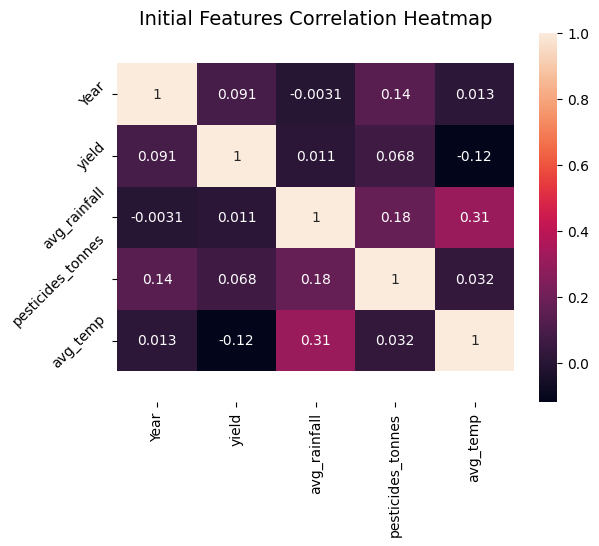

In [176]:
#correlation plot
df_corr = initial_features.corr()
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_yticklabels(ax.get_yticklabels(),rotation=45,horizontalalignment='right')
ax.set_title('Initial Features Correlation Heatmap',fontsize = 14)

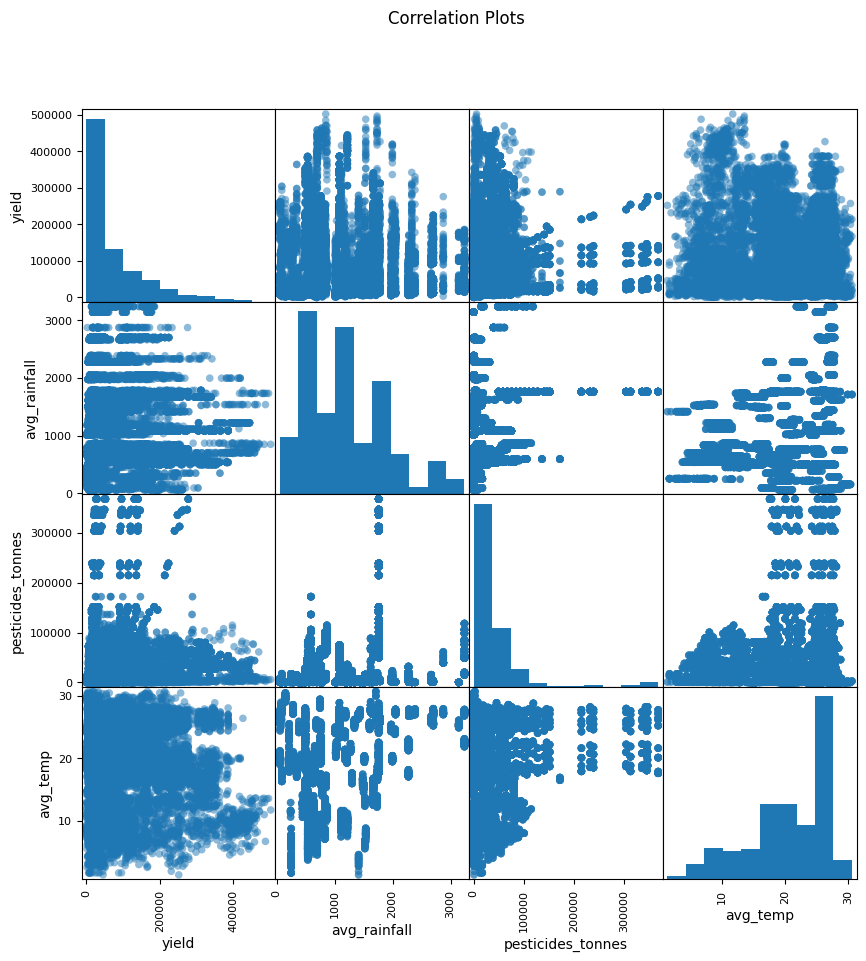

In [177]:
cols = ['yield', 'avg_rainfall', 'pesticides_tonnes', 'avg_temp']

pd.plotting.scatter_matrix(initial_features[cols], figsize=(10,10), marker='o', s=30, hist_kwds={'bins': 10})

plt.suptitle('Correlation Plots')

plt.show()

In [245]:
#average yield by crop

#Representation of crop as per yield 
initial_features1=initial_features.groupby(['Crop'])['yield'].aggregate('mean').reset_index(name='yield')
df_1=initial_features1.sort_values(by=['yield'], ascending=False)
df_1

,Crop,yield
3,Potatoes,197567.436938
0,Cassava,150763.033103
7,Sweet potatoes,117375.495572
9,Yams,114140.345927
2,Plantains and others,106245.335145
4,"Rice, paddy",39238.334986
1,Maize,35360.974613
8,Wheat,29984.547078
5,Sorghum,17683.246007
6,Soybeans,16028.517636


C:\Users\cmgas\AppData\Local\Temp\ipykernel_17268\2319377263.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_1['Crop'], rotation=45)


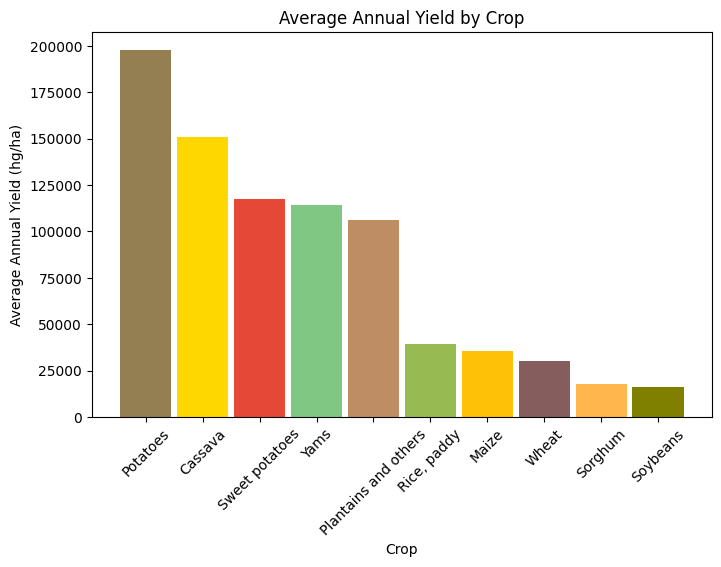

In [248]:
fig, ax = plt.subplots(figsize=(8,5))


ax.bar(df_1['Crop'], df_1['yield'], width=.9, color=colors)

ax.set_title("Average Annual Yield by Crop")
ax.set_xlabel("Crop")
ax.set_ylabel("Average Annual Yield (hg/ha)")
ax.set_title("Average Annual Yield by Crop")
ax.set_xticklabels(df_1['Crop'], rotation=45)


fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

plt.savefig('crop-wise-yield.png', facecolor='none', bbox_inches='tight', pad_inches=0.2, transparent=True)

plt.show()


# ax.bar(df_c['Country'], df_c['Yield'], width = .9, color=colors)
# ax.set_title("Country-wise yield (top 10 producers)")
# ax.set_xlabel("Country")
# ax.set_ylabel("Yield (hg/ha)")
# ax.set_xticklabels(df_c['Country'], rotation=45)

# fig.patch.set_alpha(0)
# ax.patch.set_alpha(0)

# plt.savefig('country-wise-yield.png', facecolor='none', bbox_inches='tight', pad_inches=0.2, transparent=True)

# plt.show()

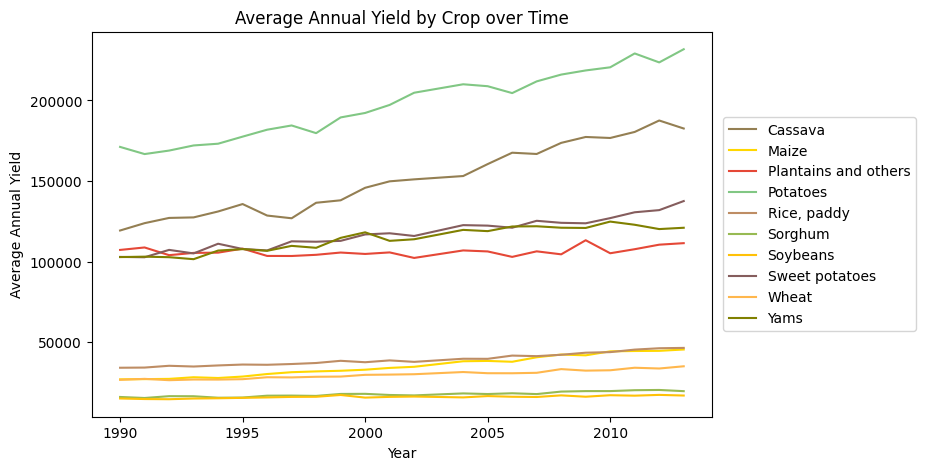

In [243]:
#crop yield by year

df2 = initial_features.groupby(['Crop','Year'])['yield'].aggregate('mean').reset_index(name='yield')

fig, ax = plt.subplots(figsize = (8,5))

crops = df2['Crop'].unique()
color_dict = dict(zip(crops, colors))

for crop in crops:
    df_crop = df2[df2['Crop'] == crop]
    ax.plot(df_crop['Year'], df_crop['yield'], label=crop, color=color_dict[crop])

ax.set_xlabel('Year')
ax.set_ylabel('Average Annual Yield')
ax.set_title('Average Annual Yield by Crop over Time')
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

fig.patch.set_alpha(0)
ax.patch.set_alpha(0)
ax.legend(facecolor='none', framealpha=0)

ax.legend(loc='center right', bbox_to_anchor=(1.34, 0.5))

plt.savefig('yield_over_time.png', facecolor='none', bbox_inches='tight', pad_inches=0.2, transparent = True)

plt.show()

In [181]:
#checking yield by country for the 10 highest-yielding countries

df_c = initial_features.groupby(['Country'])['yield'].sum().nlargest(10).reset_index(name='Yield')
df_c.head(5)


,Country,Yield
0,India,327420324
1,Brazil,167550306
2,Mexico,130788528
3,Japan,124470912
4,Australia,109111062


C:\Users\cmgas\AppData\Local\Temp\ipykernel_17268\3179409386.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_c['Country'], rotation=45)


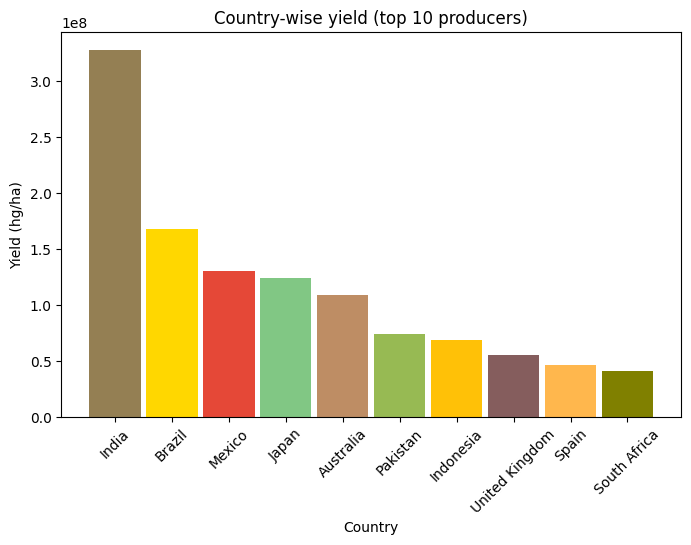

In [216]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(df_c['Country'], df_c['Yield'], width = .9, color=colors)
ax.set_title("Country-wise yield (top 10 producers)")
ax.set_xlabel("Country")
ax.set_ylabel("Yield (hg/ha)")
ax.set_xticklabels(df_c['Country'], rotation=45)

fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

plt.savefig('country-wise-yield.png', facecolor='none', bbox_inches='tight', pad_inches=0.2, transparent=True)

plt.show()

In [204]:
colors = ['#947F53', '#FFD700', '#E54837', '#81C784', '#BE8D64', '#97BA53', '#FFC107', '#855D5D', '#FFB74D', '#808000']
#colors = brown, yellow, red, green, brown 2, light green,

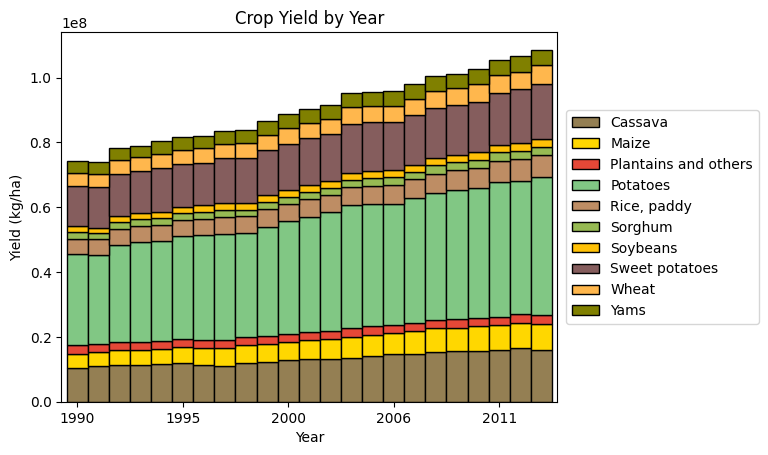

In [218]:
# group the dataframe by item and year, and sum the yield for each group
df2 = initial_features.groupby(['Crop','Year'])['yield'].sum().reset_index(name='total_yield')

# Pivot the table to make the years the rows and the crops the columns
df2 = df2.pivot(index='Year', columns='Crop', values='total_yield')

# Generate the stacked bar chart
ax = df2.plot(kind='bar', stacked=True, color=colors, width=1.0, align='center', edgecolor='black')

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Yield (kg/ha)')
ax.set_title('Crop Yield by Year')

# Set the x-tick labels to show every 5 years and rotate them horizontally
tick_years = df2.index[::5]
ax.set_xticks(range(0, len(df2.index), 5))
ax.set_xticklabels(tick_years, rotation=0)

fig.patch.set_alpha(0)
ax.patch.set_alpha(0)
ax.legend(facecolor='none', framealpha=0)

ax.legend(loc='center right', bbox_to_anchor=(1.42, 0.5))

plt.savefig('crop_yield.png', facecolor='none', bbox_inches='tight', pad_inches=0.2, transparent = True)

# Show the plot
plt.show()

EDA on all features

In [225]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [226]:
df.head(5)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,"Birth rate, crude (per 1,000 people)","Population, female (% of total population)",Land area (sq. km),Urban population (% of total population),"Labor force, total","Fertility rate, total (births per woman)","Life expectancy at birth, total (years)","Survival to age 65, female (% of cohort)","Mortality rate, infant (per 1,000 live births)",Balance of Trade (% GDP),Population in Labor Force (% of total population),Agricultural Land (% total land area),Forest Land (% total land area),Net migration (% total pop),"Patent applications (per 1,000 people)"
0,Albania,Maize,1990,36613,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0


In [ ]:
#correlation matrix
df_corr = df.corr()
ax = sns.heatmap(df_corr, annot=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5, fontsize = 5)
ax.set_yticklabels(ax.get_yticklabels(),rotation=45,horizontalalignment='right', fontsize = 5)
ax.set_title('All Features Correlation Heatmap',fontsize = 10)

In [230]:
cols_list = df.columns.tolist()
cols_list

['Area',
 'Item',
 'Year',
 'hg/ha_yield',
 'average_rain_fall_mm_per_year',
 'pesticides_tonnes',
 'avg_temp',
 'Birth rate, crude (per 1,000 people)',
 'Population, female (% of total population)',
 'Land area (sq. km)',
 'Urban population (% of total population)',
 'Labor force, total',
 'Fertility rate, total (births per woman)',
 'Life expectancy at birth, total (years)',
 'Survival to age 65, female (% of cohort)',
 'Mortality rate, infant (per 1,000 live births)',
 'Balance of Trade (% GDP)',
 'Population in Labor Force (% of total population)',
 'Agricultural Land (% total land area)',
 'Forest Land (% total land area)',
 'Net migration (% total pop)',
 'Patent applications (per 1,000 people)']

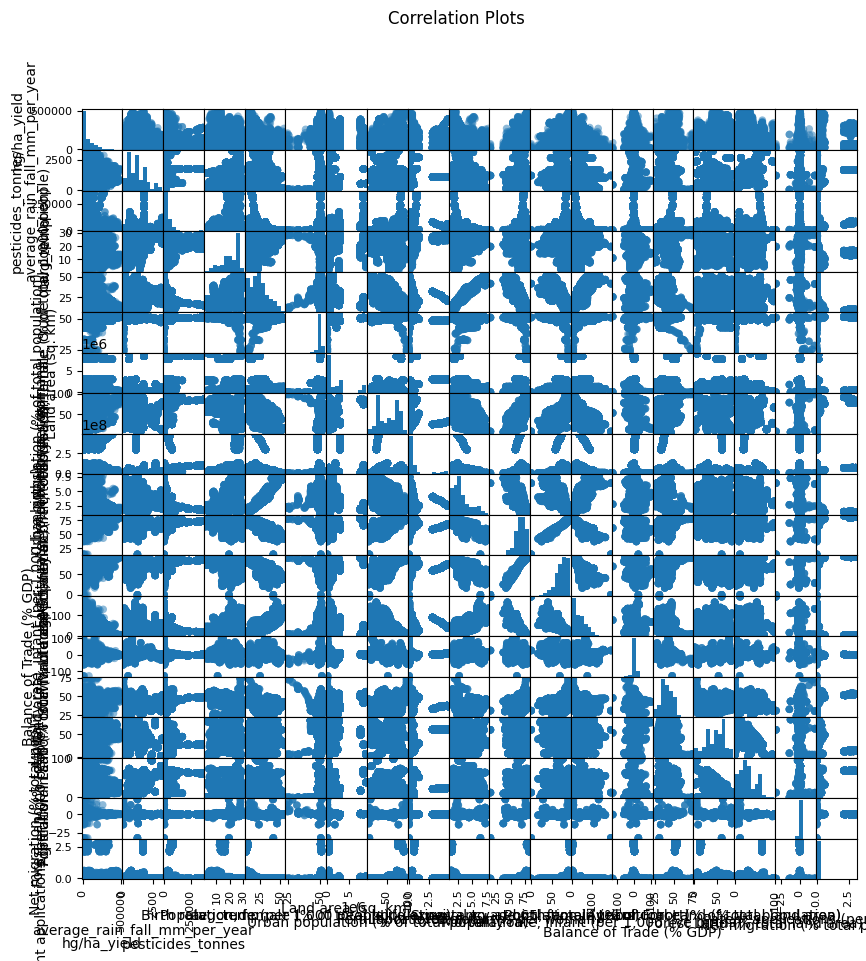

In [231]:
#correlation scatter plots 

cols = [
 'hg/ha_yield',
 'average_rain_fall_mm_per_year',
 'pesticides_tonnes',
 'avg_temp',
 'Birth rate, crude (per 1,000 people)',
 'Population, female (% of total population)',
 'Land area (sq. km)',
 'Urban population (% of total population)',
 'Labor force, total',
 'Fertility rate, total (births per woman)',
 'Life expectancy at birth, total (years)',
 'Survival to age 65, female (% of cohort)',
 'Mortality rate, infant (per 1,000 live births)',
 'Balance of Trade (% GDP)',
 'Population in Labor Force (% of total population)',
 'Agricultural Land (% total land area)',
 'Forest Land (% total land area)',
 'Net migration (% total pop)',
 'Patent applications (per 1,000 people)']

#cols = ['hg/ha_yield', 'Patent applications, residents', 'Birth rate, crude (per 1,000 people)', 'Arable land (% of land area)', 'Population, female (% of total population)', 'Agricultural land (sq. km)', 'Forest area (sq. km)', 'Urban population (% of total population)', 'Labor force, total', 'Fertility rate, total (births per woman)', 'Life expectancy at birth, total (years)', 'Number of infant deaths', 'Survival to age 65, female (% of cohort)', 'Merchandise exports (current US$)', 'Merchandise imports (current US$)']

pd.plotting.scatter_matrix(df[cols], figsize=(10,10), marker='o', s=30, hist_kwds={'bins': 10})

plt.suptitle('Correlation Plots')

plt.show()

In [249]:
df.head(5)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,"Birth rate, crude (per 1,000 people)","Population, female (% of total population)",Land area (sq. km),Urban population (% of total population),"Labor force, total","Fertility rate, total (births per woman)","Life expectancy at birth, total (years)","Survival to age 65, female (% of cohort)","Mortality rate, infant (per 1,000 live births)",Balance of Trade (% GDP),Population in Labor Force (% of total population),Agricultural Land (% total land area),Forest Land (% total land area),Net migration (% total pop),"Patent applications (per 1,000 people)"
0,Albania,Maize,1990,36613,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0


In [252]:
# assuming your dataframe is called 'df' with columns 'Country', 'Urban Area (%)', and 'Land dedicated to Agriculture (%)'
df_country = df.groupby('Area')[['Urban population (% of total population)', 'Agricultural Land (% total land area)']].mean()

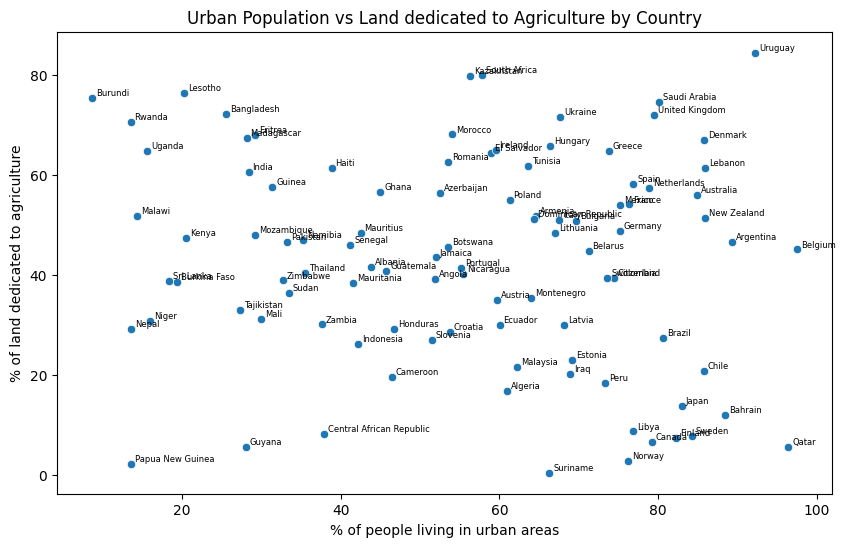

In [258]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=df_country, x='Urban population (% of total population)', y='Agricultural Land (% total land area)', ax=ax)

for country, row in df_country.iterrows():
    ax.text(row['Urban population (% of total population)'] + 0.5, row['Agricultural Land (% total land area)'] + 0.5, country, fontsize = 6)

ax.set_xlabel('% of people living in urban areas')
ax.set_ylabel('% of land dedicated to agriculture')
ax.set_title('Urban Population vs Land dedicated to Agriculture by Country')

plt.show()

In [285]:
df_yield_avg = df.groupby(['Area', 'Year']).agg({'hg/ha_yield': 'sum', 'Agricultural Land (% total land area)': 'mean'}).reset_index()
df_yield_avg = df_yield_avg.groupby(['Area']).agg({'hg/ha_yield': 'mean', 'Agricultural Land (% total land area)': 'mean'}).reset_index()
df_yield_avg.head(5)

,Area,hg/ha_yield,Agricultural Land (% total land area)
0,Albania,2.483277e+05,41.793399
1,Algeria,2.918028e+05,16.908570
2,Angola,2.488071e+05,39.073917
3,Argentina,1.428871e+06,46.643680
4,Armenia,2.154333e+05,51.915132


In [286]:
top_5 = df_yield_avg.nlargest(5, 'hg/ha_yield')
top_5

,Area,hg/ha_yield,Agricultural Land (% total land area)
40,India,1.423567e+07,60.714235
13,Brazil,7.284796e+06,27.544178
60,Mexico,5.686458e+06,54.043303
46,Japan,5.411779e+06,13.819504
5,Australia,4.743959e+06,56.067558


TypeError: Axes.text() missing 1 required positional argument: 's'

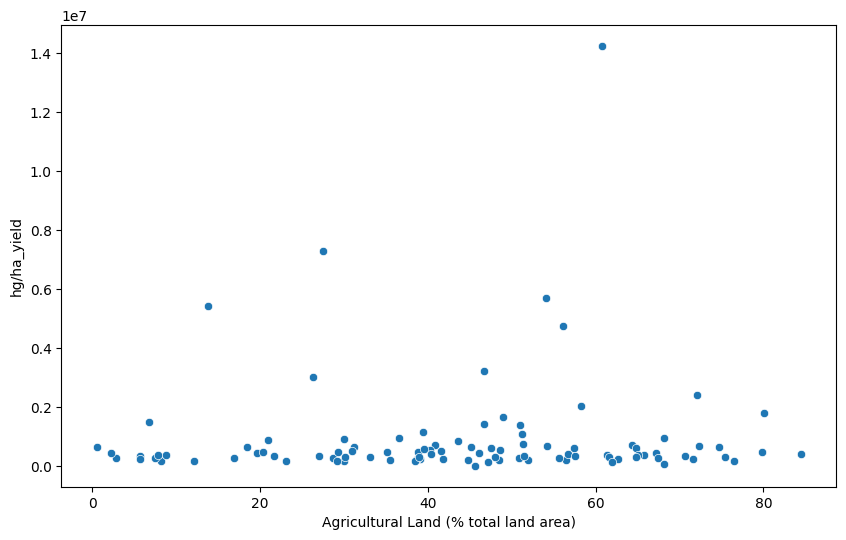

In [287]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=df_yield_avg, x='Agricultural Land (% total land area)', y='hg/ha_yield', ax=ax)

for country, row in df_yield_avg.iterrows():
    ax.text(row['Agricultural Land (% total land area)'] + 0.5, row['hg/ha_yield'] + 0.5, fontsize = 6)

ax.set_xlabel('% of land dedicated to agriculture')
ax.set_ylabel('Average Annual Yield')
ax.set_title('Agricultural Land vs Yield')

plt.show()

In [277]:
df.to_csv('updated_data.csv', index=False)

In [288]:
df_yield_avg.to_csv('for_tableau_mapping.csv', index=False)

In [289]:
df.head(5)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,"Birth rate, crude (per 1,000 people)","Population, female (% of total population)",Land area (sq. km),Urban population (% of total population),"Labor force, total","Fertility rate, total (births per woman)","Life expectancy at birth, total (years)","Survival to age 65, female (% of cohort)","Mortality rate, infant (per 1,000 live births)",Balance of Trade (% GDP),Population in Labor Force (% of total population),Agricultural Land (% total land area),Forest Land (% total land area),Net migration (% total pop),"Patent applications (per 1,000 people)"
0,Albania,Maize,1990,36613,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,24.415,49.108667,27400.0,36.428,1374478.0,2.9,73.144,86.08986,35.4,7.394431,41.821404,40.912409,28.788321,-1.604209,0.0


In [307]:
# Group by crop and calculate total production
crop_totals = df.groupby('Item')['hg/ha_yield'].sum()

# Sort crops by total production and select top four
top_three_crops = crop_totals.sort_values(ascending=False)[:3].index.tolist()

In [308]:
top_three_crops

['Potatoes', 'Sweet potatoes', 'Cassava']

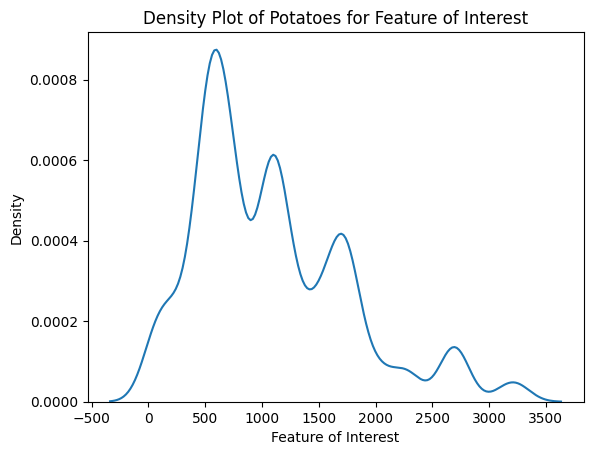

In [309]:
# filter dataframe to only include rows for a specific crop
crop_name = 'Potatoes'
crop_df = df[df['Item'] == crop_name]

# plot density of a specific feature for the filtered dataframe
sns.kdeplot(data=crop_df, x='average_rain_fall_mm_per_year')

# add title and axis labels
plt.title(f'Density Plot of {crop_name} for Feature of Interest')
plt.xlabel('Feature of Interest')
plt.ylabel('Density')
plt.show()

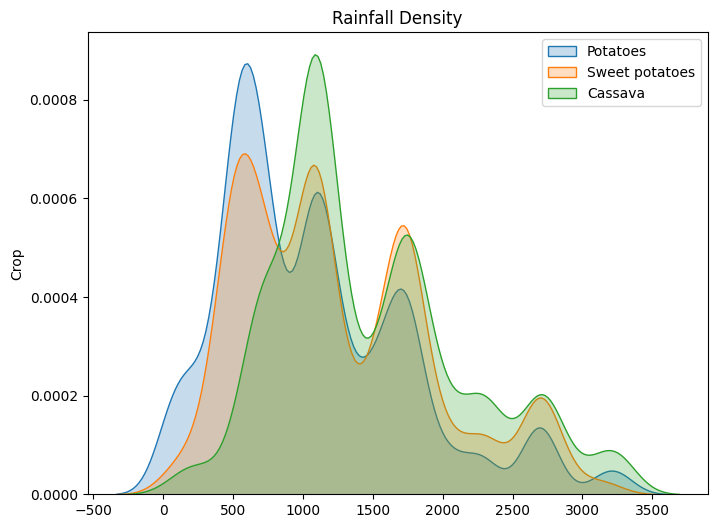

In [311]:
# create a subplot with one row and one column
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# plot the density curves for each crop
for crop in top_three_crops:
    sns.kdeplot(data=df[df['Item'] == crop], x='average_rain_fall_mm_per_year', ax=ax, label=crop, fill=True)

# set the y-axis label to the crop names
ax.set_ylabel('Crop')
ax.set_xlabel('')
ax.set_title('Rainfall Density')

ax.legend()

plt.show()

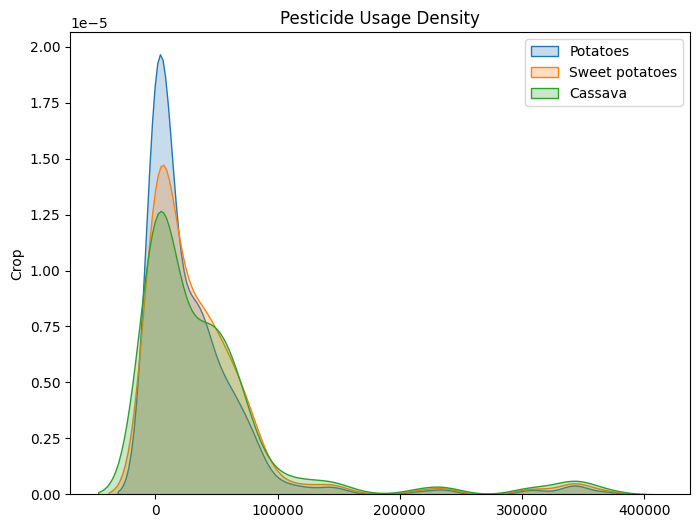

In [313]:
# create a subplot with one row and one column
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# plot the density curves for each crop
for crop in top_three_crops:
    sns.kdeplot(data=df[df['Item'] == crop], x='pesticides_tonnes', ax=ax, label=crop, fill=True)

# set the y-axis label to the crop names
ax.set_ylabel('Crop')
ax.set_xlabel('')
ax.set_title('Pesticide Usage Density')

ax.legend()

plt.show()

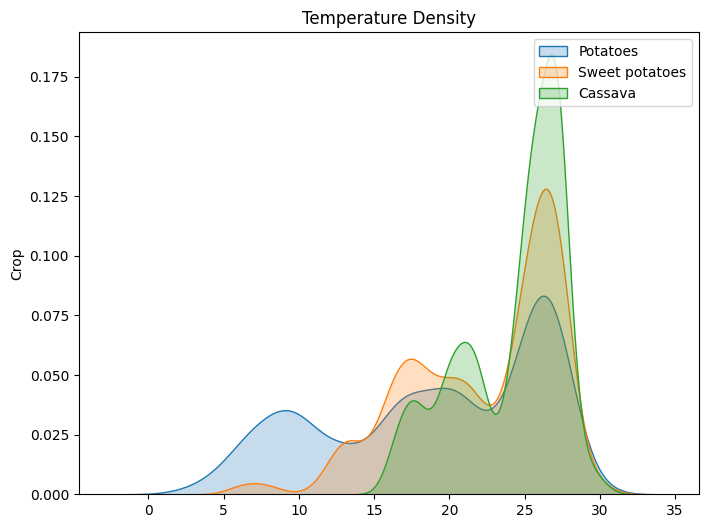

In [314]:
# create a subplot with one row and one column
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# plot the density curves for each crop
for crop in top_three_crops:
    sns.kdeplot(data=df[df['Item'] == crop], x='avg_temp', ax=ax, label=crop, fill=True)

# set the y-axis label to the crop names
ax.set_ylabel('Crop')
ax.set_xlabel('')
ax.set_title('Temperature Density')

ax.legend()

plt.show()

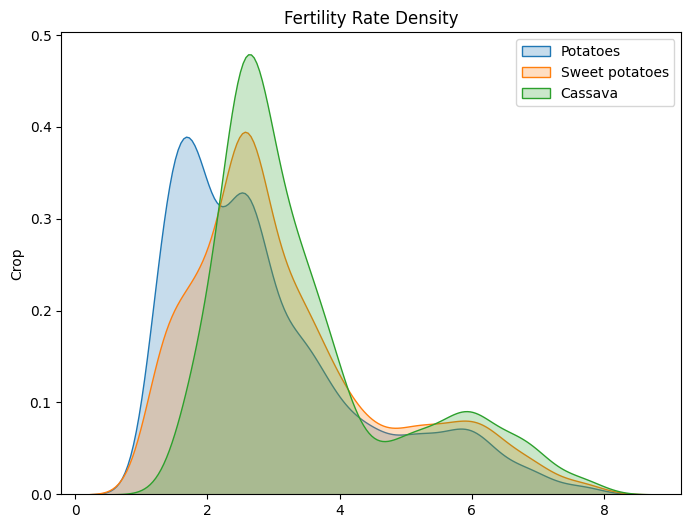

In [315]:
# create a subplot with one row and one column
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# plot the density curves for each crop
for crop in top_three_crops:
    sns.kdeplot(data=df[df['Item'] == crop], x='Fertility rate, total (births per woman)', ax=ax, label=crop, fill=True)

# set the y-axis label to the crop names
ax.set_ylabel('Crop')
ax.set_xlabel('')
ax.set_title('Fertility Rate Density')

ax.legend()

plt.show()